# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

## Status

## Solution

In [1]:
# Download the data
import numpy as np
import pandas as pd
url = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
df = pd.read_csv(url)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [38]:
# Feature engineering
from sklearn import preprocessing
mask = (df['Identification.Make'] == 'Honda') & (df['Fuel Information.Fuel Type'] == 'Gasoline')
df_mask = df[mask]
df2 = df_mask[['Engine Information.Engine Statistics.Horsepower', 'Fuel Information.Highway mpg']]
# Tror umiddelbart dette er rigtigt, men er ikke sikker. Finder de nederste 90% af af honda biler med brændstof typen gasoline ud fra deres horsepower
quantiles = df2['Engine Information.Engine Statistics.Horsepower'] < df_mask['Engine Information.Engine Statistics.Horsepower'].quantile(0.9)
df1 = df2[quantiles]



scaler = preprocessing.MinMaxScaler()
names = df1.columns 
#df1_num = df1.select_dtypes(include=[np.number]) # Bruges ikke længere
d = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df


,Engine Information.Engine Statistics.Horsepower,Fuel Information.Highway mpg
0,0.548872,0.523810
1,0.548872,0.523810
2,0.548872,0.523810
3,0.548872,0.523810
4,0.548872,0.523810
...,...,...
172,1.000000,0.238095
173,1.000000,0.190476
174,1.000000,0.238095
175,1.000000,0.190476


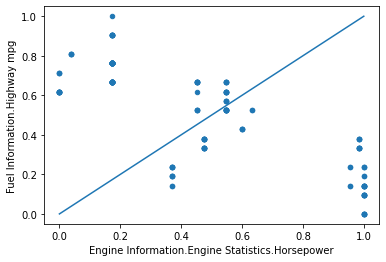

In [40]:
import matplotlib.pyplot as plt
# Ved ikke om det er rigtigt
scaled_df.plot.scatter(x = 0, y = 1)
plt.plot([0, 1])
#scaled_df.plot()

In [87]:
# Hvad er y når x = 1
import sklearn.linear_model
xs = scaled_df['Engine Information.Engine Statistics.Horsepower']
ys = scaled_df['Fuel Information.Highway mpg']
xs_reshape = np.array(xs).reshape(-1, 1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
predicted = model.predict(xs_reshape)
spending1 = model.predict([[1]])
print('x = {}'.format(spending1[0]))
predicted

x = 0.18973874951316994


array([0.46006094, 0.46006094, 0.46006094, 0.46006094, 0.46006094,
       0.46006094, 0.46006094, 0.46006094, 0.46006094, 0.46006094,
       0.46006094, 0.51863075, 0.51863075, 0.51863075, 0.51863075,
       0.46006094, 0.46006094, 0.46006094, 0.46006094, 0.51863075,
       0.51863075, 0.51863075, 0.51863075, 0.46006094, 0.46006094,
       0.46006094, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.42852335, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.42852335, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.42852335, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.42852335, 0.76642609, 0.76642609,
       0.78895294, 0.78895294, 0.78895294, 0.78895294, 0.78895